# Exercise 4: Mean Shift Algorithm for Face Recognition

This is an example of implementation of Mean-Shift algorithm for segmentation of images. The algorithms aims at recognizing faces (light pixels) from the background (darker pixels).
Mean-Shift algorithm determines the number of clusters and formes the clusters.

## 1. Developing Environment

In [20]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans, MeanShift

from sklearn import metrics
import matplotlib.pyplot as plt

# Python Imaging Library
from PIL import Image

from scipy.spatial.distance import cdist


## 2. Loading Data

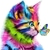

In [67]:
# Read the image file
OUR_IMAGE = 'kitty_img2.jpg'
#OUR_IMAGE = '../images/TechBBQ.jpg'
image = Image.open(OUR_IMAGE)
image

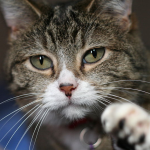

In [24]:
# Read the image file
OUR_IMAGE = 'kitty2.PNG'
#OUR_IMAGE = '../images/TechBBQ.jpg'
image = Image.open(OUR_IMAGE)
image

The algorithm expects the data stored into a data frame. Each pixel is presented by two coordinates and three colors in the RGB schema: red, green, and Blue, each measured with a value between 0 and 255.

In [68]:
image.size

(50, 50)

In [69]:
# Convert image pixels to numpy array
pix_array = np.array(image)
pix_array

array([[[255, 255, 255],
        [255, 255, 255],
        [254, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 255, 255],
        [255, 255, 255],
        [255, 255, 253],
        ...,
        [255, 255, 253],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[242, 242, 254],
        [215, 208, 239],
        [186, 172, 223],
        ...,
        [255, 253, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[239, 238, 254],
        [217, 213, 250],
        [171, 170, 230],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[226, 225, 241],
        [173, 169, 206],
        [145, 144, 204],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [70]:
# For test, get the values of pixel[0][0]
pix_array[10][20]

array([84, 32, 70], dtype=uint8)

In [71]:
# Alternativ way to get the pixel color values
pixels = image.load()
pixels[20,10]

(84, 32, 70)

In [72]:
# Convert the pixels into pandas dataframe, add the coordinates and the RGB values together
df = pd.DataFrame(
    [[x, y, pixels[x, y][0], pixels[x, y][1], pixels[x, y][2]]
        for x in range(image.size[0])
        for y in range(image.size[1])
     ],
    columns=['x', 'y', 'r', 'g', 'b']
)

In [73]:
df.head()

,x,y,r,g,b
0,0,0,255,255,255
1,0,1,255,255,255
2,0,2,254,255,255
3,0,3,255,255,255
4,0,4,255,255,255


## 3. Training a Model

In [74]:
# Train mean-shift model with the data frame
imodel = MeanShift()
imodel.fit(df)

MeanShift()

In [75]:
# See the clusters and cluster centres
imodel.cluster_centers_

array([[ 28.29772502,  19.62710188, 245.16518299, 242.11177052,
        245.93669634],
       [ 24.00128205,  26.94102564, 151.03461538, 109.45512821,
        123.11153846]])

In [76]:
len(imodel.labels_)

2500

In [77]:
# Create a function to iterate through the data and create clusters
# Remember the variables cluster_centers_ and labels_ from last time?
def image_clusters(model, output, MY_IMAGE):
    # for each cluster
    for i in range(len(model.cluster_centers_)):
        image = Image.open(MY_IMAGE)
        pixels = image.load()
        # for each pixel
        for j in range(len(df)):
            if (model.labels_[j] != i):
                # make the rest white
                pixels[int(df['x'][j]), int(df['y'][j])] = (255, 255, 255)
        image.save(output + str(i) + '.jpg')       

In [78]:
image_clusters(imodel, 'meanshift_cluster', OUR_IMAGE)

In [79]:
labels = imodel.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
n_clusters_

2

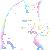

In [80]:
clustered_image0 = Image.open('meanshift_cluster0.jpg')
clustered_image0

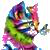

In [81]:
clustered_image1 = Image.open('meanshift_cluster1.jpg')
clustered_image1

## 4. Validating the Model with K-Means

In [82]:
# Determine k by minimizing the distortion - 
# the sum of the squared distances between each observation vector and its centroid
distortions = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k).fit(df)
    model.fit(df)
    distortions.append(sum(np.min(cdist(df, model.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0]) 
print("Distortion: ", distortions)

Distortion:  [74.07633553258289, 59.193399023425506, 52.98670896233445, 48.52671311175442, 44.82557973873666, 42.57230603479037, 40.73627590671324, 39.117819276020825]


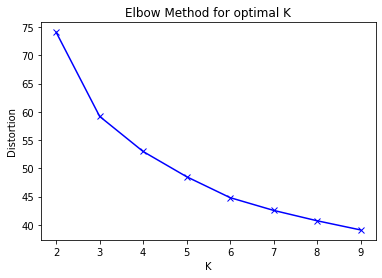

In [83]:
# Plot the elbow
plt.title('Elbow Method for optimal K')
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

In [84]:
# K-means model fitting with specified number of clusters
k_means_model = KMeans(n_clusters=3)
k_means_model.fit(df)

KMeans(n_clusters=3)

In [85]:
# Create image clusters
image_clusters(k_means_model, 'kmeans_cluster', OUR_IMAGE)

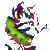

In [86]:
clustered_image0 = Image.open('kmeans_cluster0.jpg')
clustered_image0

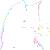

In [87]:
clustered_image1 = Image.open('kmeans_cluster1.jpg')
clustered_image1

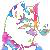

In [88]:
clustered_image2 = Image.open('kmeans_cluster2.jpg')
clustered_image2

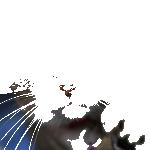

In [91]:
clustered_image3 = Image.open('kmeans_cluster3.jpg')
clustered_image3

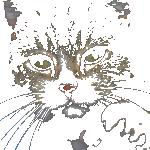

In [90]:
clustered_image4 = Image.open('kmeans_cluster4.jpg')
clustered_image4

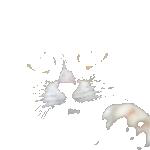

In [60]:
clustered_image5 = Image.open('kmeans_cluster5.jpg')
clustered_image5

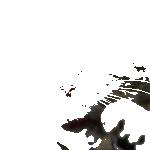

In [61]:
clustered_image6 = Image.open('kmeans_cluster6.jpg')
clustered_image6